<a href="https://colab.research.google.com/github/SurekhaBerlin/BCGX-Data-Science-Internship/blob/main/BCGX_Data_Science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS & CLEANING**

# **STEP 0: Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

# **STEP 1: Reading the Data**


### Loading data with Pandas
We need to load client_data.csv and price_data.csv into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the read_csv method accordingly.

In [2]:
client_df = pd.read_csv('/content/client_data.csv')
price_df = pd.read_csv('/content/price_data.csv')

# **STEP 2: Data Understanding**

In [3]:
# see the data shape of dataset
client_df.shape

(14606, 26)

In [4]:

price_df.shape

(99549, 8)

In [5]:
# you can view the 1st 5 rows of a dataframe using head method.
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### Data types
It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the info() method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99549 entries, 0 to 99548
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  99549 non-null  object 
 1   price_date          99549 non-null  object 
 2   price_off_peak_var  99549 non-null  float64
 3   price_peak_var      99549 non-null  float64
 4   price_mid_peak_var  99549 non-null  float64
 5   price_off_peak_fix  99548 non-null  float64
 6   price_peak_fix      99548 non-null  float64
 7   price_mid_peak_fix  99548 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.1+ MB


In [9]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [10]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,99549.0,0.141045,0.024842,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,99549.0,0.053888,0.050006,0.0,0.000000,0.085100,0.101673,0.181480
price_mid_peak_var,99549.0,0.030317,0.036302,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,99548.0,43.364372,5.404839,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,99548.0,10.565206,12.848037,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,99548.0,6.358793,7.758626,0.0,0.000000,0.000000,16.226389,17.458221


# **STEP 3: Data Cleaning**

The datatype of date_activ, date_end, date_modif_prod and date_renewal is object, so we need to convert them to datetime.

In [11]:
date=["date_activ", "date_end", "date_modif_prod", "date_renewal"]

In [12]:
for i in date:
  client_df[i] = pd.to_datetime(client_df[i])

In [13]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [14]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"])

In [15]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99549 entries, 0 to 99548
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  99549 non-null  object        
 1   price_date          99549 non-null  datetime64[ns]
 2   price_off_peak_var  99549 non-null  float64       
 3   price_peak_var      99549 non-null  float64       
 4   price_mid_peak_var  99549 non-null  float64       
 5   price_off_peak_fix  99548 non-null  float64       
 6   price_peak_fix      99548 non-null  float64       
 7   price_mid_peak_fix  99548 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.1+ MB


Missing Data

In [16]:
#Check how much of our data is missing
pd.DataFrame({"Missing value (%)": client_df.isnull().sum()/len(client_df.index)*100})

,Missing value (%)
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


In [17]:
pd.DataFrame({"Missing value (%)": price_df.isnull().sum()/len(price_df.index)*100})

,Missing value (%)
id,0.000000
price_date,0.000000
price_off_peak_var,0.000000
price_peak_var,0.000000
price_mid_peak_var,0.000000
price_off_peak_fix,0.001005
price_peak_fix,0.001005
price_mid_peak_fix,0.001005


# **STEP 4: Data Modeling**

Churn Percentage

In [18]:
churn=client_df[['id','churn']]
churn.columns=['Companies','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100

In [19]:
churn_percentage

,Companies
churn,
0,90.284814
1,9.715186


# **STEP 5: Exploratory Data Analysis**

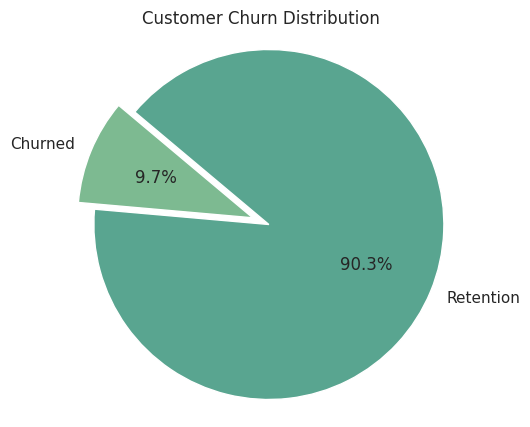

In [20]:

# Prepare the DataFrame
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']

# Group by churn status and count
churn_total = churn.groupby('churn').count()

# Calculate churn percentages
churn_percentage = (churn_total / churn_total.sum()) * 100

# Extract churn and not churned percentages
churned_percentage = churn_percentage.loc[1, 'Companies']
not_churned_percentage = churn_percentage.loc[0, 'Companies']

# Data for the pie chart
sizes = [churned_percentage, not_churned_percentage]
labels = ['Churned', 'Retention']

# Set Seaborn style and palette
sns.set(style="whitegrid")
colors = sns.color_palette("crest", as_cmap=False)  # Get the crest palette
explode = (0.1, 0)  # Highlight the 'Churned' slice

# Plotting the pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Customer Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

About 10% of total customers have churned, it is imbalanced dataset, so in the modeling process, we need to handle this problem.

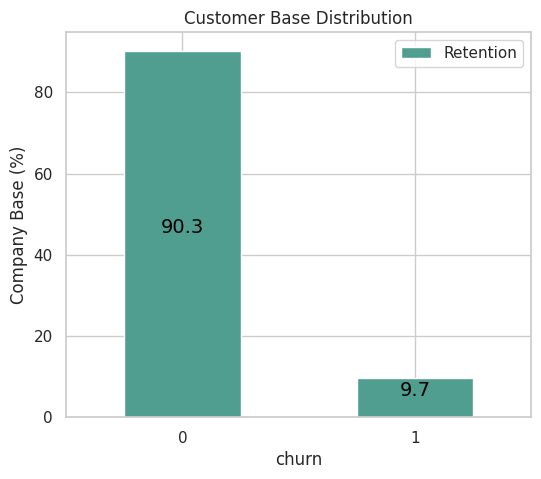

In [21]:
# Set Seaborn style and palette
sns.set(style="whitegrid")
colors = sns.color_palette("crest", n_colors=2)  # Get the crest palette with 2 colors

# Plotting the bar chart with the crest color palette
ax = churn_percentage.plot(kind='bar', stacked=True, figsize=(6, 5), color=colors, rot=0)

# Annotate bars with percentages
def annotate_stacked_bars(ax, pad=1.02, colour="black", textsize=13):
    """
    Add value annotations to the bars in a stacked bar chart.
    """
    for p in ax.patches:
        value = p.get_height()
        if value == 0:
            continue
        # Calculate annotation position
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.annotate(
            f'{value:.1f}',  # Format value with one decimal place
            (x, y),
            color=colour,
            size=textsize,
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            xytext=(0, 5),  # Offset the text slightly
            textcoords='offset points'
        )

annotate_stacked_bars(ax, textsize=14)

# Customize the legend
plt.legend(['Retention', 'Churn'], loc='upper right')

# Label and title
plt.ylabel('Company Base (%)')
plt.title('Customer Base Distribution')

# Show the plot
plt.show()

Sale Channels

Sale channels can play an important role in customer's rentation or churn. Some strong sale channels can create quality and loyal customers

In [22]:
client_df. channel_sales.value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [23]:
client_df. churn.value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

In [24]:
channel=client_df[['id', 'channel_sales', 'churn']]

In [25]:
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)

In [26]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

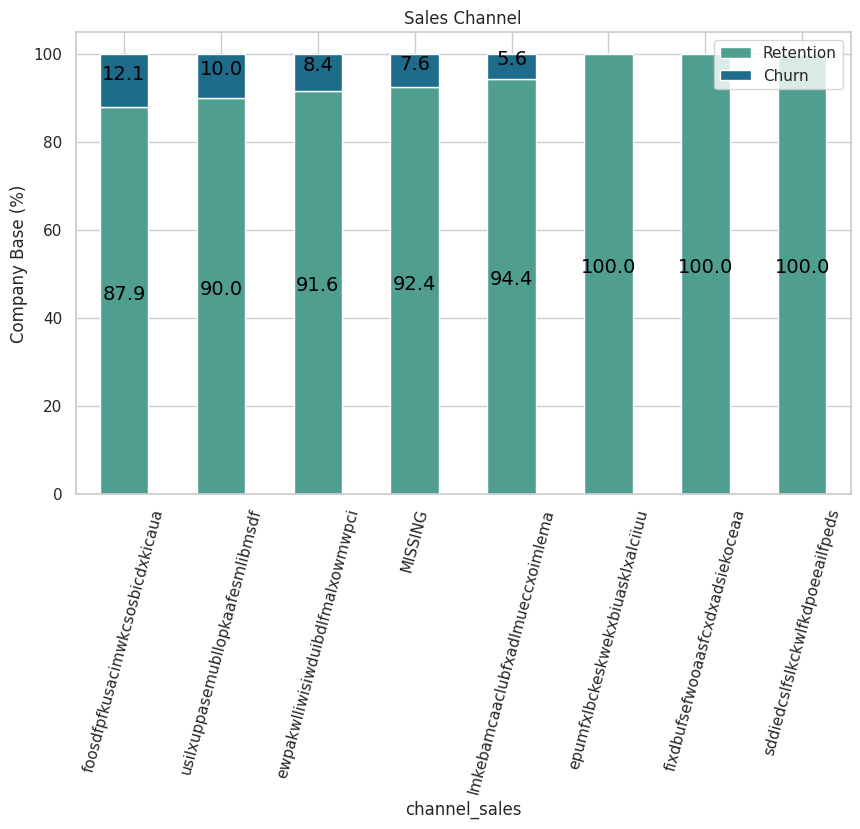

In [27]:
# Set Seaborn style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("crest", n_colors=2)  # Get the crest palette with 2 colors

# Plotting the bar chart with the crest color palette
ax = channel_churn.plot(kind='bar', stacked=True, figsize=(10, 6), rot=75, color=colors)

# Function to annotate stacked bars
def annotate_stacked_bars(ax, pad=1.02, colour="black", textsize=13):
    """
    Add value annotations to the bars in a stacked bar chart.
    """
    for p in ax.patches:
        value = p.get_height()
        if value == 0:
            continue
        # Calculate annotation position
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.annotate(
            f'{value:.1f}',  # Format value with one decimal place
            (x, y),
            color=colour,
            size=textsize,
            ha='center',  # Horizontal alignment
            va='center',  # Vertical alignment
            xytext=(0, 5),  # Offset the text slightly
            textcoords='offset points'
        )

# Annotate bars with percentages
annotate_stacked_bars(ax, textsize=14)

# Customize the legend
plt.legend(['Retention', 'Churn'], loc='upper right')

# Add title and labels
plt.title('Sales Channel')
plt.ylabel('Company Base (%)')

# Show the plot
plt.show()

There are 5 Sale channels having churn rate.

Consumption

Now, we will see the consumption of customers during the last month and 12 months againt the churn. Because this is a numeric - categorical comparison therefore we can use histogram distribution or box plot visualization.

In [35]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]

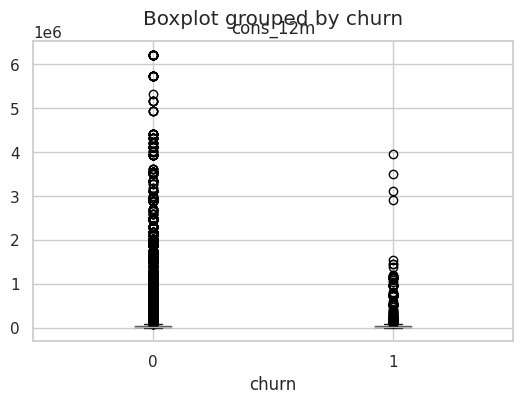

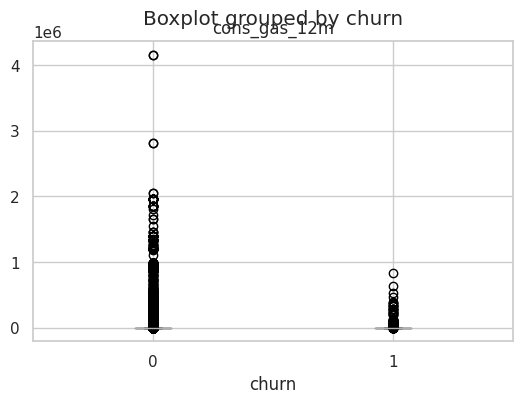

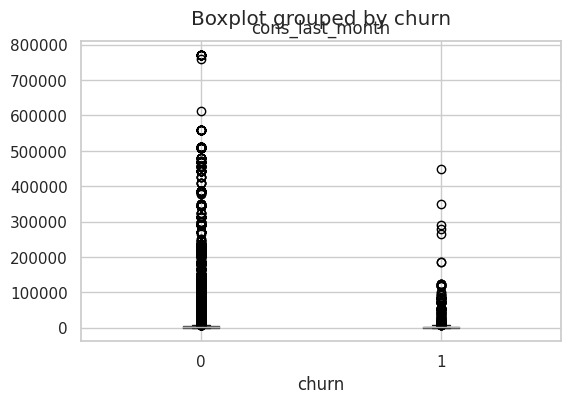

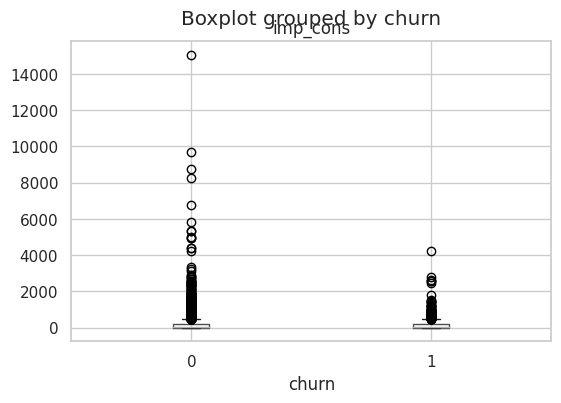

In [37]:
for col in consumption:
    client_df.boxplot(column = col, by = 'churn', figsize = (6,4))
    plt.title(col)

plt.show()

We will create a plot_distribution function to see the spread and skewness of the data.

In [38]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

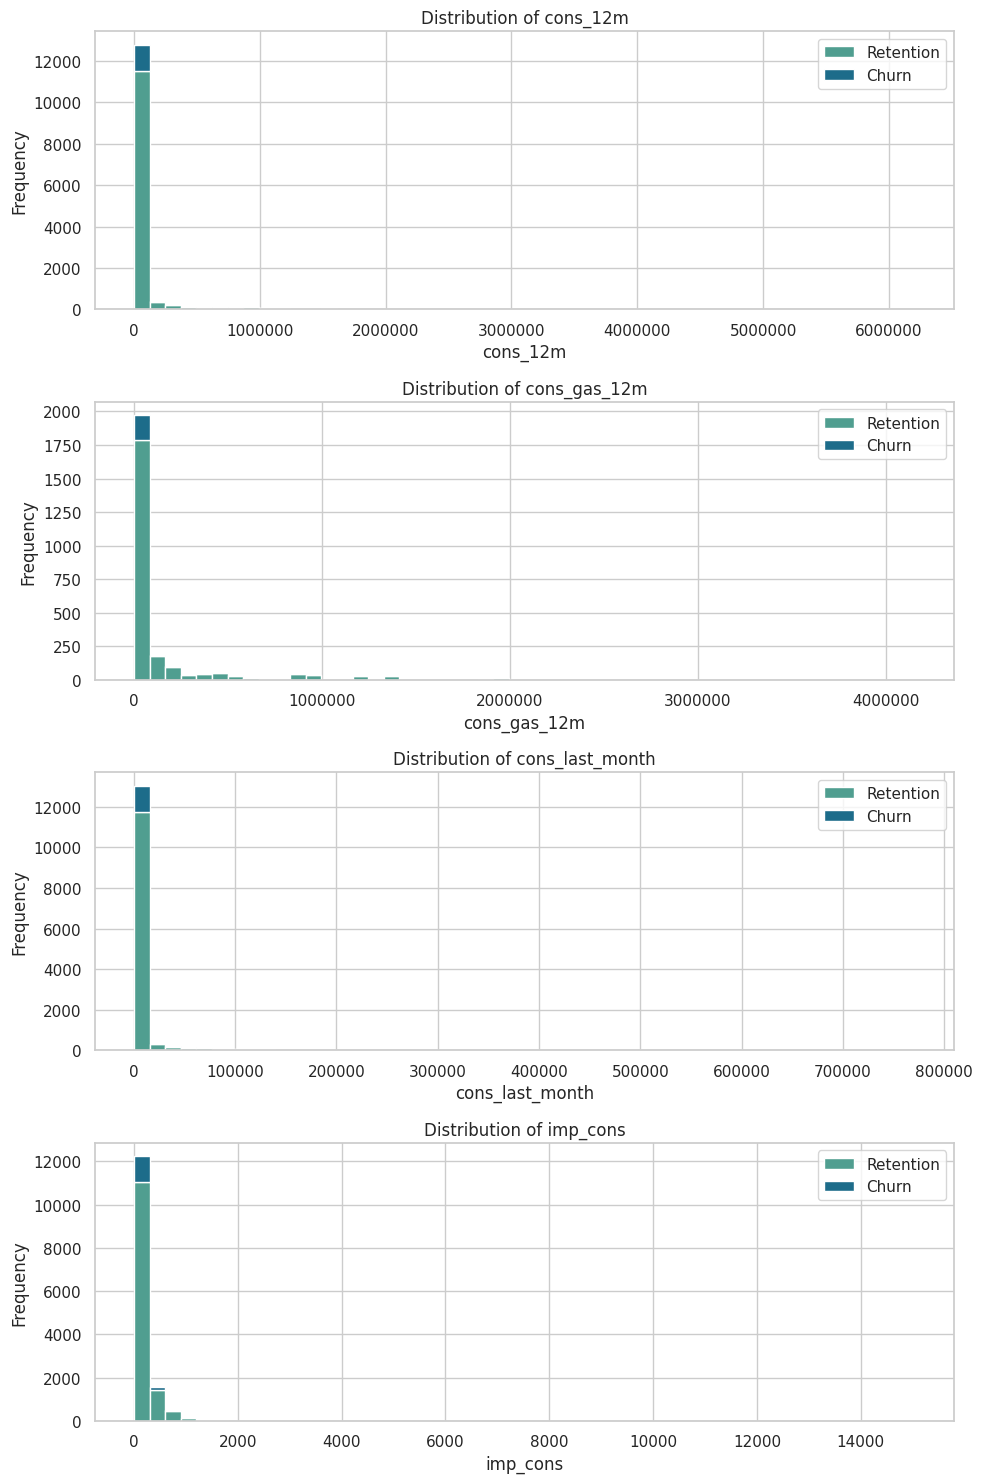

In [53]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plotted
    temp = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"] == 0][column],
        "Churn": dataframe[dataframe["churn"] == 1][column]
    })

    # Define the color palette from seaborn's "crest" palette
    colors = sns.color_palette("crest", n_colors=2)  # Get 2 shades from the "crest" palette

    # Plot the histogram
    temp[["Retention", "Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, color=colors)

    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
    # Title
    ax.set_title(f'Distribution of {column}')


# Create subplots
fig, axs = plt.subplots(nrows=4, figsize=(10, 15))

# Plot histograms using the 'crest' color palette
plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

There are a lot of outliers at the upper in the dataset and it is highly positive skewed. we'll address skewness and outliers in the feature engineering.

Forecast

In [48]:
forecast = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

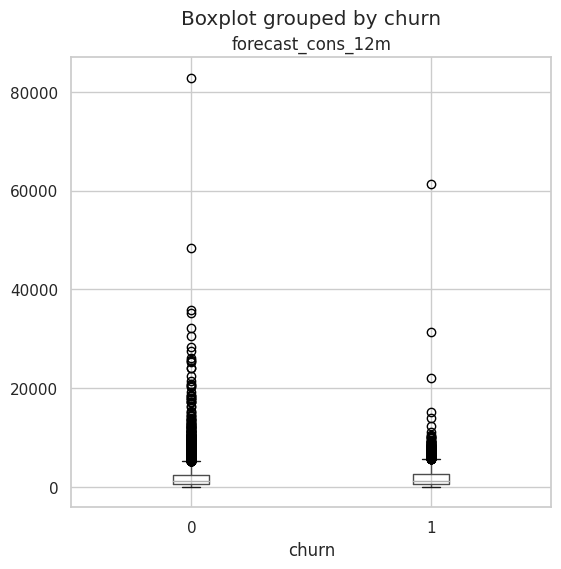

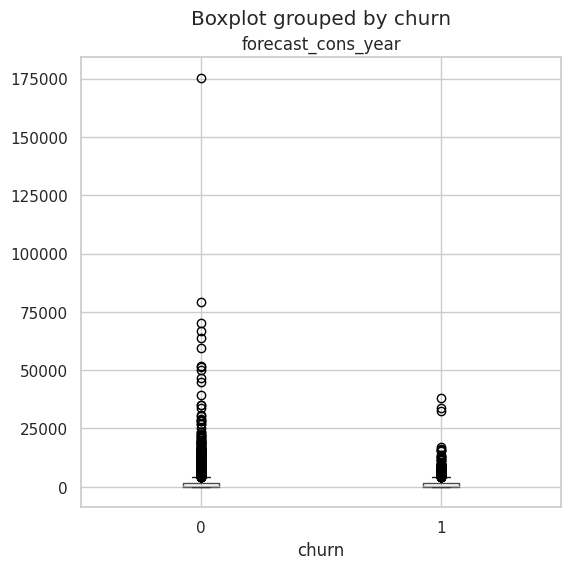

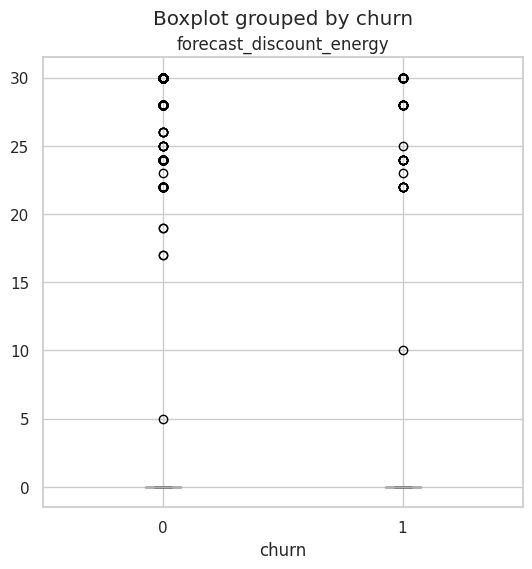

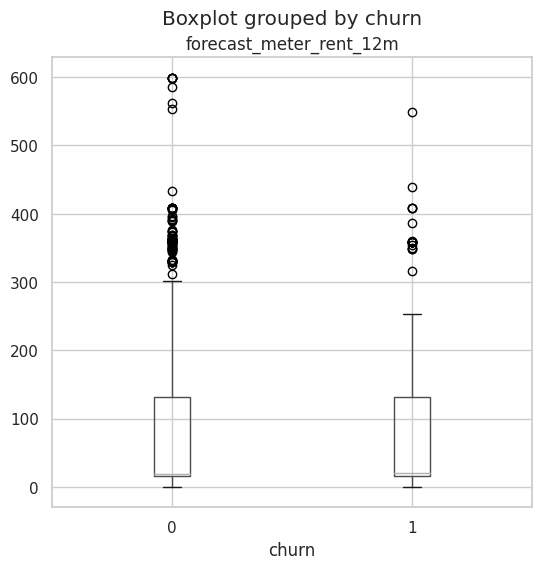

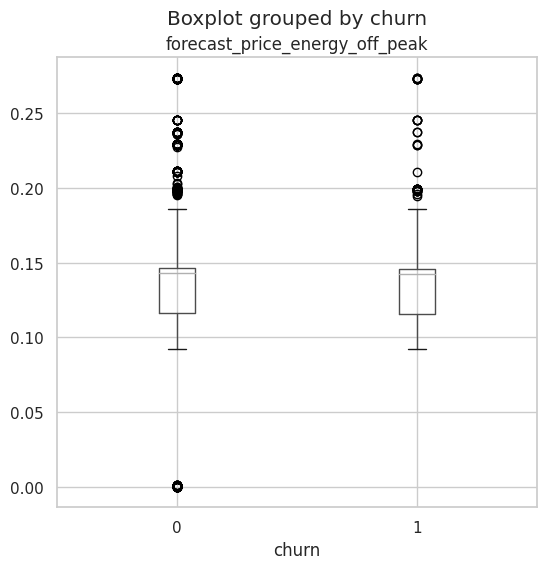

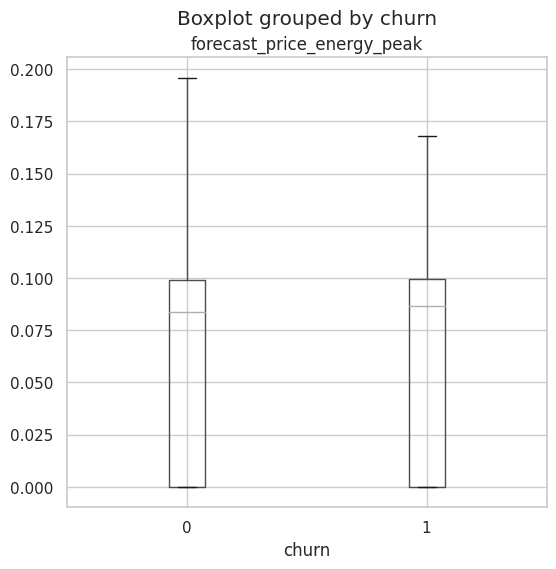

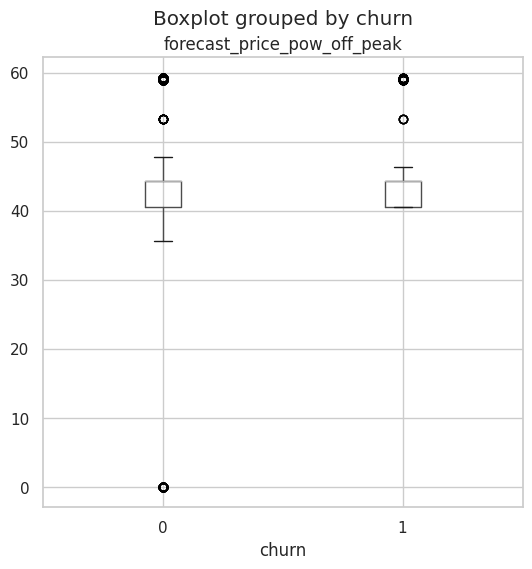

In [49]:
for col in forecast:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

Similar to consumption, forecast variables also show postive skewed.

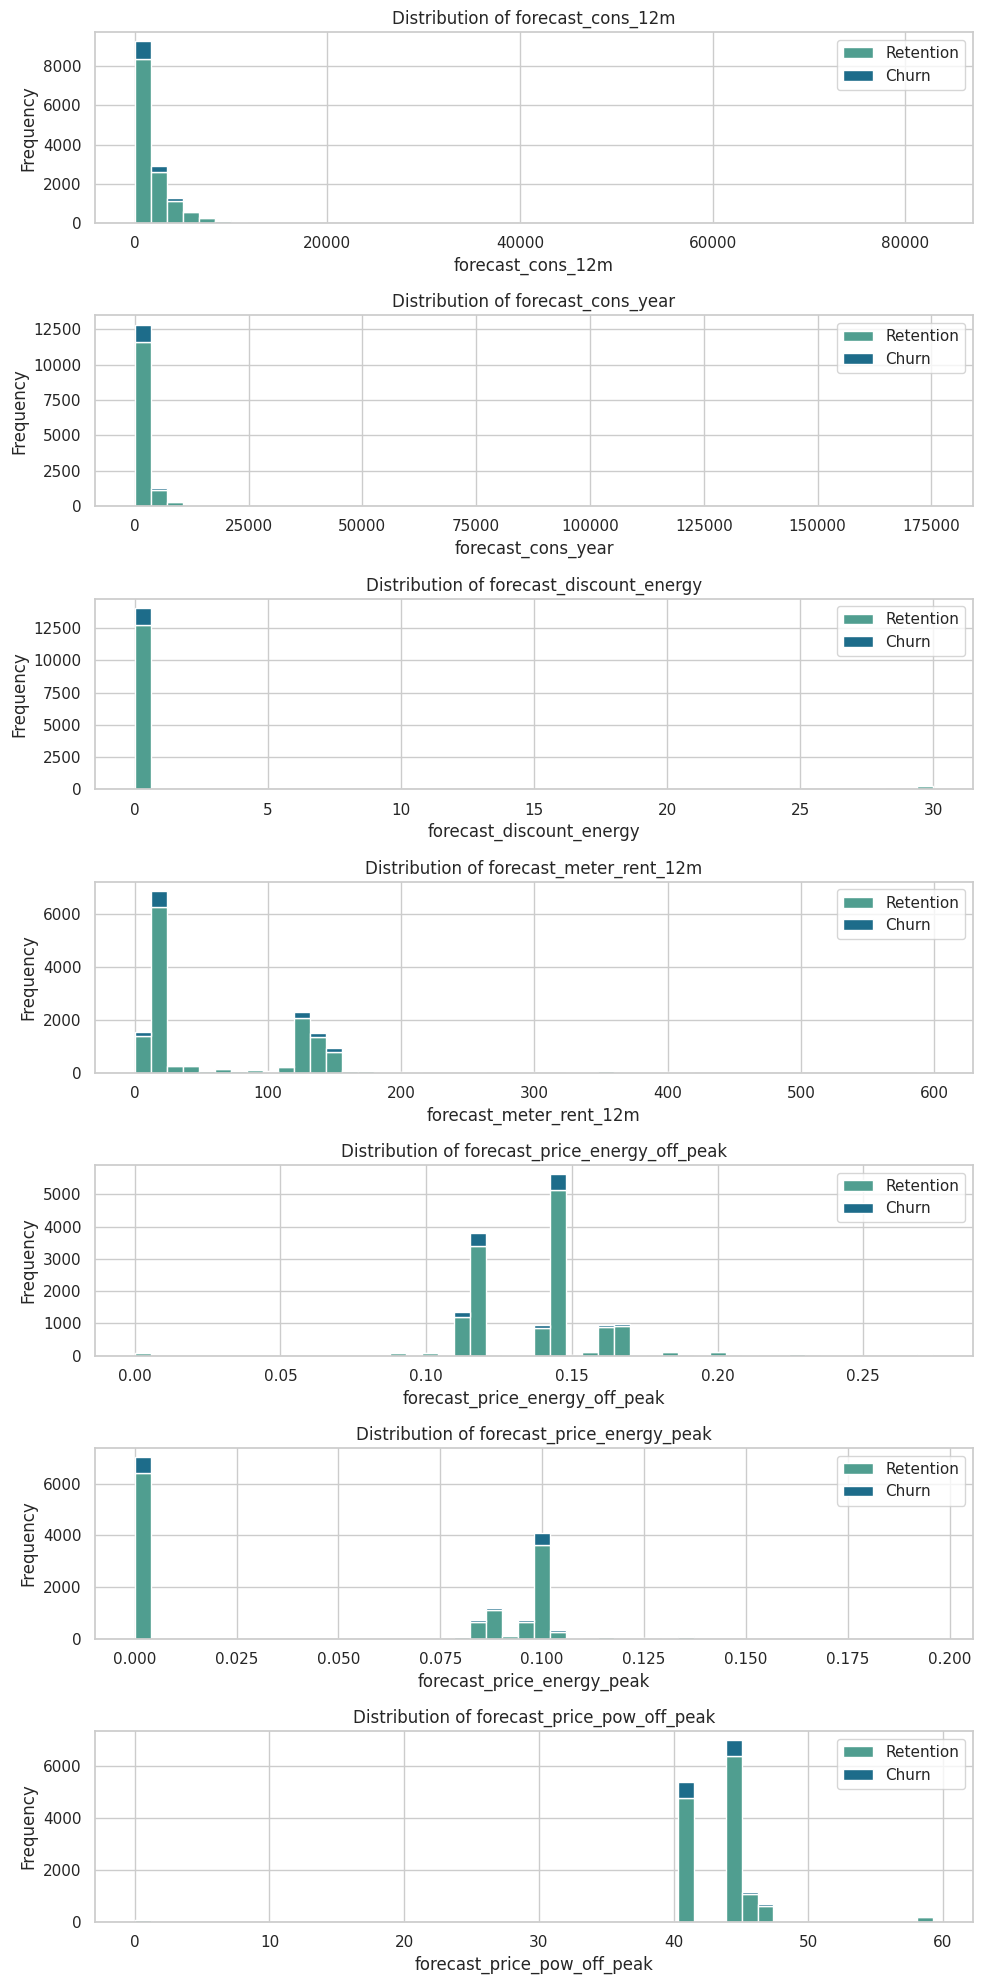

In [52]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporary dataframe with the data to be plotted
    temp = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"] == 0][column],
        "Churn": dataframe[dataframe["churn"] == 1][column]
    })

    # Define the color palette from seaborn's "crest" palette
    colors = sns.color_palette("crest", n_colors=2)  # Get 2 shades from the "crest" palette

    # Plot the histogram
    temp[["Retention", "Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, color=colors)

    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
    # Title
    ax.set_title(f'Distribution of {column}')
# Create subplots
fig, axs = plt.subplots(nrows=7, figsize=(10, 20))

# Plot histograms using the 'crest' color palette
plot_distribution(client_df, 'forecast_cons_12m', axs[0])
plot_distribution(client_df, 'forecast_cons_year', axs[1])
plot_distribution(client_df, 'forecast_discount_energy', axs[2])
plot_distribution(client_df, 'forecast_meter_rent_12m', axs[3])
plot_distribution(client_df, 'forecast_price_energy_off_peak', axs[4])
plot_distribution(client_df, 'forecast_price_energy_peak', axs[5])
plot_distribution(client_df, 'forecast_price_pow_off_peak', axs[6])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

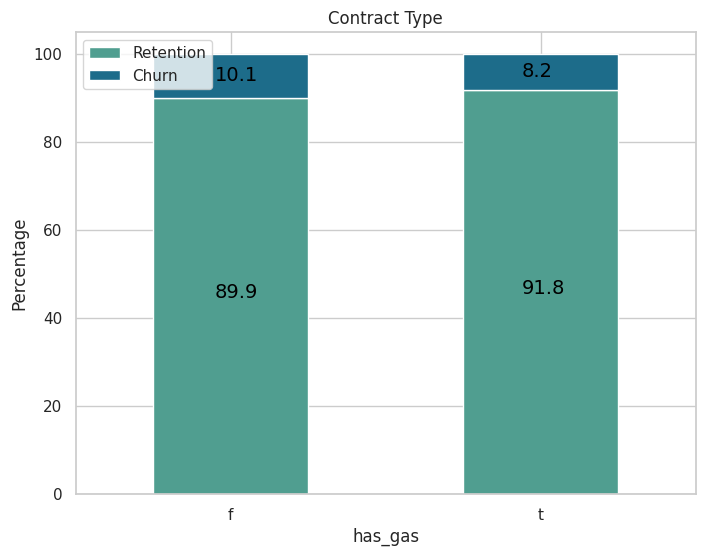

In [55]:
#Contract type

def annotate_stacked_bars(ax, pad=0.99, colour="black", textsize=13):
    """
    Add value annotations to the bars
    """
    for p in ax.patches:
        value = str(round(p.get_height(), 1))
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x() + p.get_width() / 2) * pad - 0.05, (p.get_y() + p.get_height() / 2) * pad),
            color=colour,
            size=textsize
        )
# Create contract type DataFrame and calculate percentages
contract_type = client_df[["id", "has_gas", "churn"]]
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Define color palette from seaborn's "crest" palette
colors = sns.color_palette("crest", n_colors=2)  # Get 2 shades from the "crest" palette

# Plotting
ax = contract_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0, color=colors)
annotate_stacked_bars(ax, textsize=14)
plt.legend(['Retention', 'Churn'], loc="upper left")
plt.title("Contract Type")
plt.ylabel("Percentage")
plt.show()

The churn rate for customer without contract is a little bit higher than customers with contract.

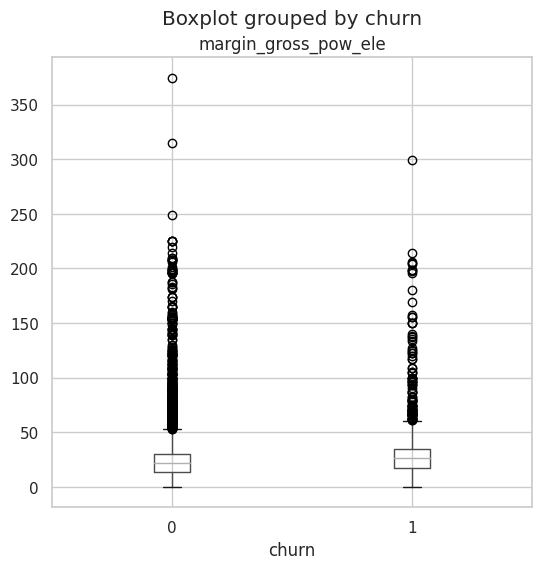

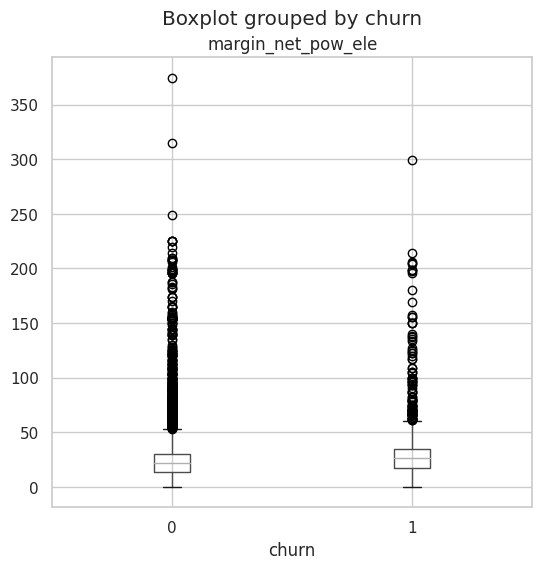

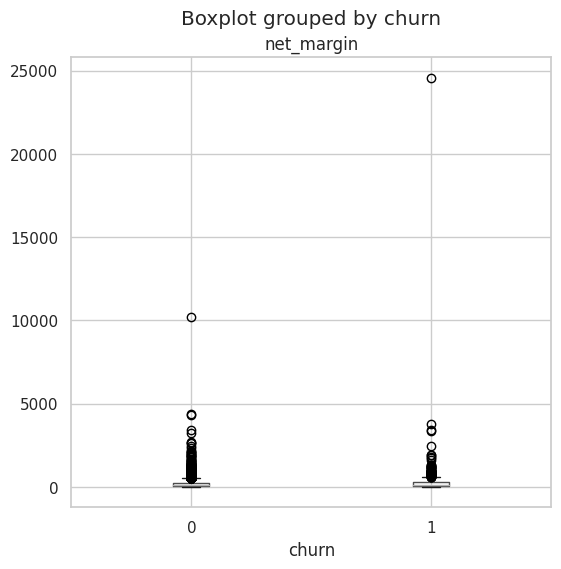

In [57]:
#Margins
margin = client_df[["margin_gross_pow_ele", "margin_net_pow_ele", "net_margin"]]
for col in margin:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()



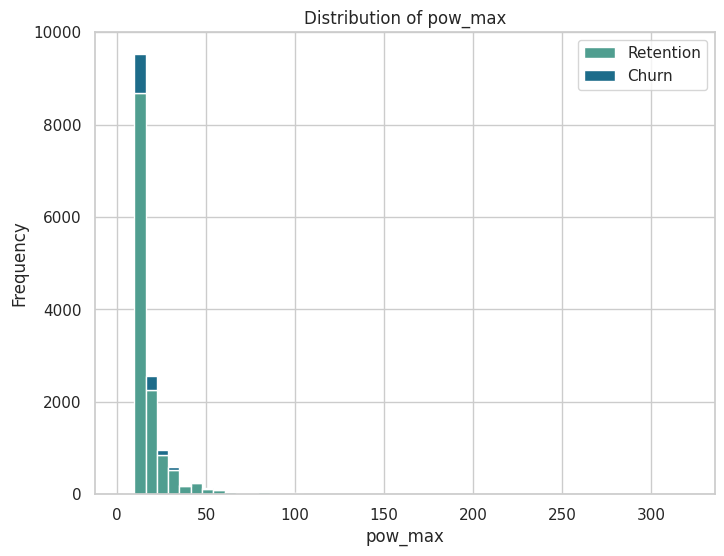

In [61]:
#Subscribed power

power = client_df[["id", "pow_max", "churn"]]
fig, axs = plt.subplots(nrows=1, figsize=(8, 6))
plot_distribution(power, 'pow_max', axs)